In [4]:
import torch
import requests
import pandas as pd
from PIL import Image
from io import BytesIO
from datasets import load_dataset
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
from tqdm import tqdm

# Kích hoạt tiến trình cho pandas
tqdm.pandas()

d:\Asus\Ungdung\Anacoda\Anacoda\envs\clip_chroma_streamlit\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
# Tải cả train và test
image_data_train = load_dataset("conceptual_captions", split="train")
image_data_test = load_dataset("conceptual_captions", split="validation")

In [90]:
image_data_train

Dataset({
    features: ['image_url', 'caption'],
    num_rows: 3318333
})

In [91]:
import os


df_data_train = pd.DataFrame(image_data_train)
df_data_test = pd.DataFrame(image_data_test)


train_dir = './client/data/data_text_to_img/train'
test_dir = './client/data/data_text_to_img/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def check_valid_urls(image_url):
    try:
        response = requests.get(image_url)
        Image.open(BytesIO(response.content)) 
        return True
    except Exception as e:
        print(f"Error loading image from URL: {image_url} -> {e}")
        return False

def save_images_to_folder(df, folder, type):

    df_copy = df.copy() 
    counter = 0
    for idx, row in df_copy.iterrows():
        image_url = row['image_url']

        if not check_valid_urls(image_url):
            df_copy.loc[idx, 'image_path'] = None
            df_copy.loc[idx, 'is_valid'] = False
            continue 

        try:
            response = requests.get(image_url)
            img = Image.open(BytesIO(response.content))

            image_path = os.path.join(folder, f"{type}_{counter}.png")

            img.save(image_path)

            df_copy.loc[idx, 'image_path'] = image_path
            df_copy.loc[idx, 'is_valid'] = True

            print(f"Image {counter} saved successfully.")
            counter += 1
        except Exception as e:
            print(f"Error saving image {image_url}: {e}")
            # Cập nhật nếu có lỗi trong việc lưu ảnh
            df_copy.loc[idx, 'image_path'] = None
            df_copy.loc[idx, 'is_valid'] = False
    return df_copy


# Lưu ảnh vào thư mục train và test và cập nhật cột 'image_path'
df_data_train_updated = save_images_to_folder(
    df_data_train[:20], train_dir, 'train')
df_data_test_updated = save_images_to_folder(
    df_data_test[:20], test_dir, 'test')

# In kết quả
print("Images have been saved to train and test directories.")

Image 0 saved successfully.
Image 1 saved successfully.
Error loading image from URL: https://media.gettyimages.com/photos/young-confused-girl-standing-in-front-of-a-wardrobe-picture-id511063329?s=612x612 -> cannot identify image file <_io.BytesIO object at 0x000001A8072499F0>
Image 2 saved successfully.
Image 3 saved successfully.
Error loading image from URL: https://media.gettyimages.com/photos/jayz-attends-the-chicago-bulls-vs-brooklyn-nets-playoff-game-at-the-picture-id167112882 -> cannot identify image file <_io.BytesIO object at 0x000001A791161810>
Image 4 saved successfully.
Image 5 saved successfully.
Image 6 saved successfully.
Error loading image from URL: http://www.robinhoodshow.com/clients/17668/8642054_org.jpg -> cannot identify image file <_io.BytesIO object at 0x000001A791161C70>
Image 7 saved successfully.
Error loading image from URL: https://www.swissinfo.ch/image/40654192/3x2/1024/682/a312f173f207c67824ea7fcf8079012a/gA/tabakinschweiz-15-jpg.jpg -> cannot identify 

In [4]:
df_data_train_updated.to_csv(
    './client/caches/data_text_to_img/train_data.csv', index=False)

NameError: name 'df_data_train_updated' is not defined

In [5]:
image_data_df = pd.read_csv('./client/caches/data_text_to_img/train_data.csv')
image_data_df

,image_url,caption,image_path,is_valid
0,http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/...,a very typical bus station,./client/data/data_text_to_img/train\train_0.png,True
1,http://78.media.tumblr.com/3b133294bdc7c7784b7...,sierra looked stunning in this top and this sk...,./client/data/data_text_to_img/train\train_1.png,True
2,https://media.gettyimages.com/photos/young-con...,young confused girl standing in front of a war...,NaN,False
3,https://thumb1.shutterstock.com/display_pic_wi...,interior design of modern living room with fir...,./client/data/data_text_to_img/train\train_2.png,True
4,https://thumb1.shutterstock.com/display_pic_wi...,cybernetic scene isolated on white background .,./client/data/data_text_to_img/train\train_3.png,True
5,https://media.gettyimages.com/photos/jayz-atte...,gangsta rap artist attends sports team vs play...,NaN,False
6,https://prismpub.com/wp-content/uploads/2016/1...,the jetty : different types of plants to estab...,./client/data/data_text_to_img/train\train_4.png,True
7,https://thumb1.shutterstock.com/display_pic_wi...,traditional ornamental floral paisley bandanna .,./client/data/data_text_to_img/train\train_5.png,True
8,https://media.gettyimages.com/photos/bryan-mcc...,# of the sports team skates against sports tea...,./client/data/data_text_to_img/train\train_6.png,True
9,http://www.robinhoodshow.com/clients/17668/864...,by geographical feature category or in the cit...,NaN,False


In [6]:
def check_valid_urls(image_url):
    try:
        response = requests.get(image_url)
        Image.open(BytesIO(response.content))
        return True
    except:
        return False
    
def get_img(file_path):
    try:
        # Mở ảnh từ tệp
        image = Image.open(file_path)
        return image
    except Exception as e:
        print(f"Error occurred: {e}")
        return False

#### a. Check valid image path

In [7]:
image_data_df = image_data_df.loc[image_data_df['is_valid'] == True].reset_index(
    drop=True)
image_data_df

,image_url,caption,image_path,is_valid
0,http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/...,a very typical bus station,./client/data/data_text_to_img/train\train_0.png,True
1,http://78.media.tumblr.com/3b133294bdc7c7784b7...,sierra looked stunning in this top and this sk...,./client/data/data_text_to_img/train\train_1.png,True
2,https://thumb1.shutterstock.com/display_pic_wi...,interior design of modern living room with fir...,./client/data/data_text_to_img/train\train_2.png,True
3,https://thumb1.shutterstock.com/display_pic_wi...,cybernetic scene isolated on white background .,./client/data/data_text_to_img/train\train_3.png,True
4,https://prismpub.com/wp-content/uploads/2016/1...,the jetty : different types of plants to estab...,./client/data/data_text_to_img/train\train_4.png,True
5,https://thumb1.shutterstock.com/display_pic_wi...,traditional ornamental floral paisley bandanna .,./client/data/data_text_to_img/train\train_5.png,True
6,https://media.gettyimages.com/photos/bryan-mcc...,# of the sports team skates against sports tea...,./client/data/data_text_to_img/train\train_6.png,True
7,http://i.dailymail.co.uk/i/pix/2016/08/10/15/3...,a flight was traveling when the animal got fre...,./client/data/data_text_to_img/train\train_7.png,True
8,http://images.gmanews.tv/webpics/2016/11/640_2...,celebrities start decorating for the christmas...,./client/data/data_text_to_img/train\train_8.png,True
9,http://images.slideplayer.com/2/765769/slides/...,functions of government : 1 . form a more perf...,./client/data/data_text_to_img/train\train_9.png,True


#### b. get image

In [8]:
image_data_df['image'] = image_data_df['image_path'].apply(get_img)

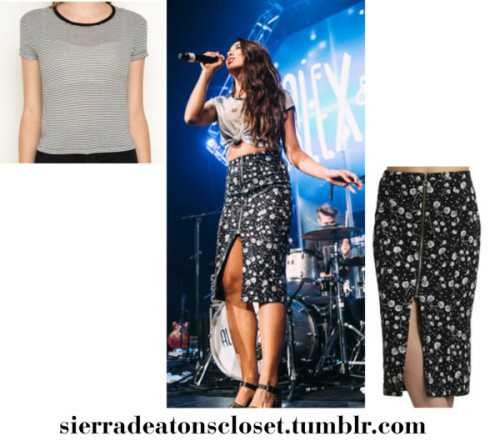

In [9]:
image_data_df.iloc[1]["image"]

## Create Embeddings: Text and Image Embeddings

In [11]:
def get_model_info(model_id, device):

  # Save the model to device
  model = CLIPModel.from_pretrained(model_id).to(device)

  # Get the processor
  processor = CLIPProcessor.from_pretrained(model_id)

  # Get the tokenizer
  tokenizer = CLIPTokenizer.from_pretrained(model_id)

  # Return model, processor & tokenizer
  return model, processor, tokenizer

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model_ID = "openai/clip-vit-base-patch32"
model, processor, tokenizer = get_model_info(model_ID, device)

d:\Asus\Ungdung\Anacoda\Anacoda\envs\clip_chroma_streamlit\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


#### Text Embeddings

In [3]:
def get_single_text_embedding(text):
    # trả về là 1 tensor
    inputs = tokenizer(text, return_tensors='pt')
    text_embeddings = model.get_text_features(**inputs)
    # convert the embeddings to numpy array 
    embedding_as_np = text_embeddings.cpu().detach().numpy()
    return embedding_as_np[0].tolist()


embedding = get_single_text_embedding('a very typical bus station')

NameError: name 'tokenizer' is not defined

In [14]:
image_data_df["text_embeddings"] = image_data_df['caption'].progress_apply(
    get_single_text_embedding)

100%|██████████| 11/11 [00:00<00:00, 23.03it/s]


#### Image Embedding

In [15]:
inputs = processor(images=image_data_df['image'][0], return_tensors="pt")

In [8]:
def get_single_image_embedding(img):
    # trả về là 1 tensor
    inputs = processor(images=img, return_tensors="pt")[
        'pixel_values'].to(device)
    text_embeddings = model.get_image_features(inputs)
    # convert the embeddings to numpy array
    embedding_as_np = text_embeddings.cpu().detach().numpy()
    return embedding_as_np[0].tolist()

In [17]:
image_data_df["img_embeddings"] = image_data_df['image'].progress_apply(
    get_single_image_embedding)

100%|██████████| 11/11 [00:02<00:00,  5.22it/s]


In [14]:
image_data_df.head(3)

,image_url,caption,image_path,is_valid,image,text_embeddings,img_embeddings
0,http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/...,a very typical bus station,./client/data/data_text_to_img/train\train_0.png,True,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[0.25922349095344543, -0.0882587730884552, 0.0...","[-0.003401851747184992, -0.0535832978785038, 0..."
1,http://78.media.tumblr.com/3b133294bdc7c7784b7...,sierra looked stunning in this top and this sk...,./client/data/data_text_to_img/train\train_1.png,True,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[0.004146583378314972, 0.1894354224205017, -0....","[-0.25020280480384827, -0.1325775384902954, 0...."
2,https://thumb1.shutterstock.com/display_pic_wi...,interior design of modern living room with fir...,./client/data/data_text_to_img/train\train_2.png,True,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[0.5606449246406555, -0.15138041973114014, -0....","[-0.16011293232440948, -0.2958280146121979, -0..."


In [21]:
import chromadb

db_path = r"./server/database/database_txt_img"

client = chromadb.PersistentClient(path=db_path)



collection = client.get_or_create_collection(
    name='multimodal_collection', metadata={"hnsw:space": "cosine"})

ids = [f"id_{i}" for i in image_data_df.index]
text_embeddings = image_data_df['text_embeddings'].to_list()
img_embeddings = image_data_df['img_embeddings'].to_list()
cations = image_data_df['caption'].to_list()

collection.add(
    ids=ids,
    embeddings=img_embeddings,
    metadatas=[{"caption": caption} for caption in cations]
)

collection.add(
    ids=ids,
    embeddings=text_embeddings,
)

Add of existing embedding ID: id_0
Add of existing embedding ID: id_1
Add of existing embedding ID: id_2
Add of existing embedding ID: id_3
Add of existing embedding ID: id_4
Add of existing embedding ID: id_5
Add of existing embedding ID: id_6
Add of existing embedding ID: id_7
Add of existing embedding ID: id_8
Add of existing embedding ID: id_9
Add of existing embedding ID: id_10
Add of existing embedding ID: id_0
Add of existing embedding ID: id_1
Add of existing embedding ID: id_2
Add of existing embedding ID: id_3
Add of existing embedding ID: id_4
Add of existing embedding ID: id_5
Add of existing embedding ID: id_6
Add of existing embedding ID: id_7
Add of existing embedding ID: id_8
Add of existing embedding ID: id_9
Add of existing embedding ID: id_10
Insert of existing embedding ID: id_0
Insert of existing embedding ID: id_1
Insert of existing embedding ID: id_2
Insert of existing embedding ID: id_3
Insert of existing embedding ID: id_4
Insert of existing embedding ID: id_5


In [18]:
image_data_df['caption'].to_list()

['a very typical bus station',
 'sierra looked stunning in this top and this skirt while performing with person at their former university',
 'interior design of modern living room with fireplace in a new house',
 'cybernetic scene isolated on white background .',
 'the jetty : different types of plants to establish a variety of ecosystems .',
 'traditional ornamental floral paisley bandanna .',
 '# of the sports team skates against sports team during their game .',
 'a flight was traveling when the animal got free on tuesday night',
 'celebrities start decorating for the christmas season lifestyle',
 'functions of government : 1 . form a more perfect union',
 'all shots by by person and rider shots can be found on his website .']

In [3]:
data = pd.read_csv(
    'D:\Asus\AIO\Project\Text_Image_Retrieval-Streamlit\client\caches\multimodal_db.csv')
data

,image_url,caption,image_path,is_valid,image
0,http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/...,a very typical bus station,d:\Asus\AIO\Project\Text_Image_Retrieval-Strea...,True,<PIL.PngImagePlugin.PngImageFile image mode=RG...
1,https://prismpub.com/wp-content/uploads/2016/1...,the jetty : different types of plants to estab...,d:\Asus\AIO\Project\Text_Image_Retrieval-Strea...,True,<PIL.PngImagePlugin.PngImageFile image mode=RG...
2,https://media.gettyimages.com/photos/bryan-mcc...,# of the sports team skates against sports tea...,d:\Asus\AIO\Project\Text_Image_Retrieval-Strea...,True,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,http://images.gmanews.tv/webpics/2016/11/640_2...,celebrities start decorating for the christmas...,d:\Asus\AIO\Project\Text_Image_Retrieval-Strea...,True,<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,https://ep1.pinkbike.org/p4pb6973204/p4pb69732...,all shots by by person and rider shots can be ...,d:\Asus\AIO\Project\Text_Image_Retrieval-Strea...,True,<PIL.PngImagePlugin.PngImageFile image mode=RG...


In [1]:
import chromadb
db_path = r"./server/database2/database_multimodal"

client = chromadb.PersistentClient(path=db_path)

In [2]:
collection = client.get_or_create_collection(
    name='text_to_image_collection',
    metadata={"hnsw:space": "cosine"}
)

In [20]:
embedding = get_single_text_embedding('functions of government : 1 . form a more perfect union')
results = collection.query(
    query_embeddings=embedding,
    n_results=5,
    include=['metadatas', 'distances']
)

In [21]:
results

{'ids': [[]],
 'distances': [[]],
 'metadatas': [[]],
 'embeddings': None,
 'documents': None,
 'uris': None,
 'data': None}